In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("russia_losses_equipment.csv")

df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date")

art_candidates = ["field_artillery", "artillery_systems", "artillery"]
art_col = None
for col in art_candidates:
    if col in df.columns:
        art_col = col
        break

tank_col = None
if "tank" in df.columns:
    tank_col = "tank"
elif "tanks" in df.columns:
    tank_col = "tanks"

print("Колонка артилерії:", art_col)
print("Колонка танків:", tank_col)


Колонка артилерії: field_artillery
Колонка танків: tank


Добові втрати польової артилерії

In [2]:
df["daily_field_artillery"] = df[art_col].diff()

df[["date", "daily_field_artillery"]].head(10)


,date,daily_field_artillery
1367,2022-02-25,NaN
1366,2022-02-26,0.0
1365,2022-02-27,1.0
1364,2022-02-28,24.0
1363,2022-03-01,3.0
1362,2022-03-02,8.0
1361,2022-03-03,5.0
1360,2022-03-04,15.0
1359,2022-03-05,0.0
1358,2022-03-06,4.0


3 найбільші добові втрати артилерії

In [3]:
top3 = df.nlargest(3, "daily_field_artillery")[["date", "daily_field_artillery"]]
top3.reset_index(drop=True)


,date,daily_field_artillery
0,2025-03-28,122.0
1,2025-03-23,104.0
2,2025-03-21,101.0


Втрати артилерії влітку 2025 року

In [4]:
summer_mask = (df["date"] >= "2025-06-01") & (df["date"] <= "2025-08-31")
summer = df.loc[summer_mask, "daily_field_artillery"]

destroyed_summer_2025 = summer.sum(skipna=True)
destroyed_summer_2025


np.float64(3724.0)

Середні втрати за останні 300 днів

In [5]:
mean_last_300 = df["daily_field_artillery"].dropna().tail(300).mean()
mean_last_300


np.float64(40.82)

Графік втрат за перший рік війни

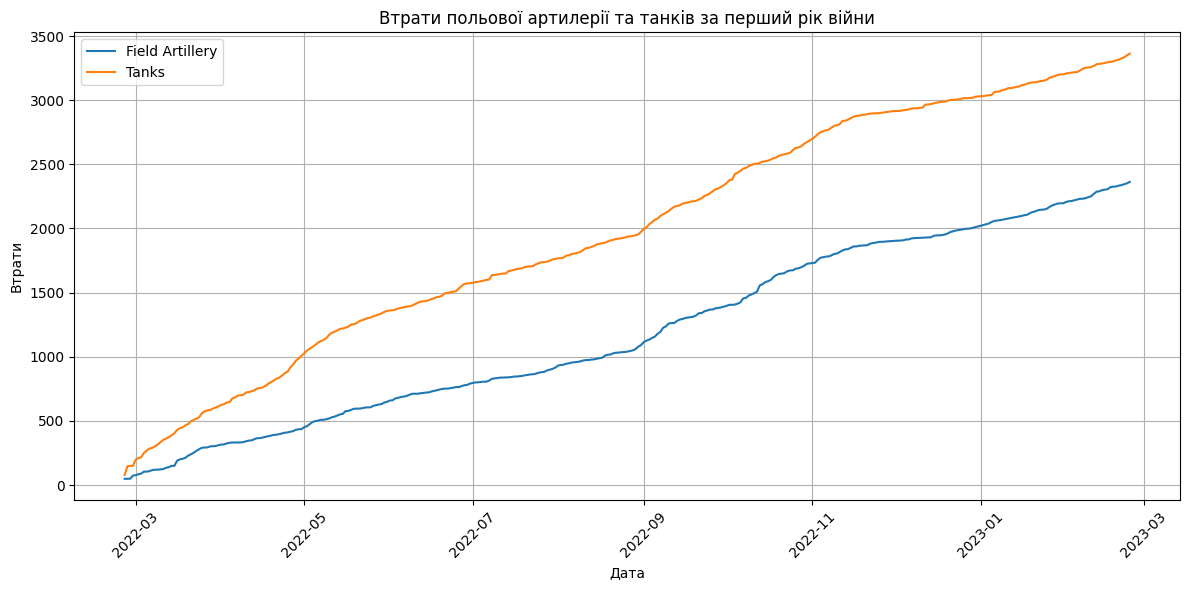

In [6]:
first_date = df["date"].min()
one_year_later = first_date + pd.Timedelta(days=365)

first_year = df[(df["date"] >= first_date) & (df["date"] < one_year_later)]

plt.figure(figsize=(12, 6))
plt.plot(first_year["date"], first_year[art_col], label="Field Artillery")
plt.plot(first_year["date"], first_year[tank_col], label="Tanks")
plt.title("Втрати польової артилерії та танків за перший рік війни")
plt.xlabel("Дата")
plt.ylabel("Втрати")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
